# Unsupervised Learning
Unsupervised learning is the branch of machine learning which learns from the unlabelled data. Contrary to supervised learning, the data are not labelled here. The algorithms learn from commanalities in the data instead of response to feedbak as is the case for supervised learning.

# bit.ly/fuseai5 
Short link for this notebook

## Principal Component Analysis (PCA)

**Mathematical Definition**: *a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.*

PCA extracts principal components from the data in the order of decreasing varience. As principal components accounting for high variance in the data can be extracted, it can be used to reduce dimension of the data. The number of components taken is represented traditionally by *k*. 

It can be used for:
* Dimensionality Reduction
* Noise Reduction
* Visualization
* Feature Extraction

### Visualization and Intuition

Let's start by importing the regular python packages.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

We create here arbitrary 2D dataset by taking the points randomly and see their scatter plot.

(-0.03442986489117186,
 0.7743295268982644,
 -0.04823117179412516,
 1.0594536485068737)

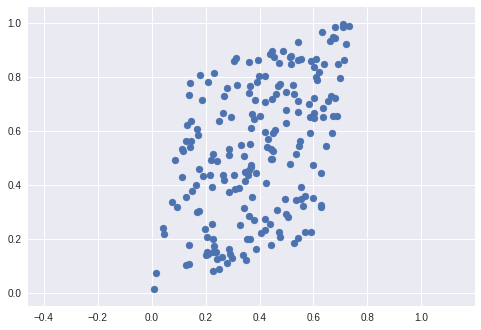

In [0]:
X = np.matmul(np.random.rand(2, 2), np.random.rand(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

Let's fit PCA to our dataset using *sklearn* package.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The principal axes can be viewed by using *components_* property.

In [0]:
print(pca.components_)

[[-0.44480772 -0.89562609]
 [-0.89562609  0.44480772]]


While doing dimensionality reduction, we take components such that the varience explained by them is as much as possible.

In [0]:
print(pca.explained_variance_)

[0.07525377 0.0211187 ]


Helper function *draw_vector* to help visualize the principal components.

The faded points represent actual data and the arrows represent the principal components. The length of arrow signifies the degree of variance explained by the component.

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x'), Text(0.5, 1.0, 'input')]

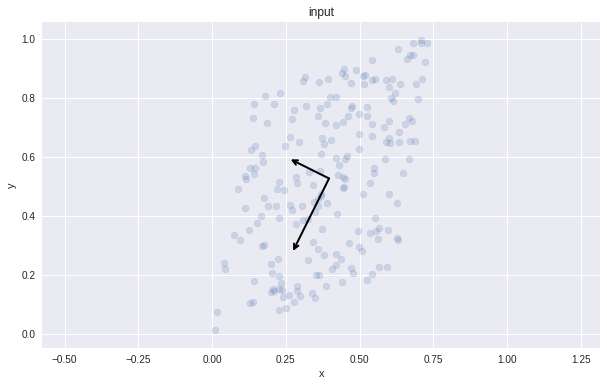

In [0]:

def draw_vector(start, end, ax=None):
  ax = ax or plt.gca()
  arrowprops = dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0,
                    shrinkB=0)
  ax.annotate('', end, start, arrowprops=arrowprops)

  
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax)
ax.axis('equal');
ax.set(xlabel='x', ylabel='y', title='input')  

### PCA in Dimensionality Reduction

Let's take the *2D* data, *X*, and reduce the data to one dimension and see how good it can fit. 

In [0]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

print("Original shape: ", X.shape)
print("Transformed shape: ", X_pca.shape)

Original shape:  (200, 2)
Transformed shape:  (200, 1)


By plotting the original data and reduced data, we see how well the pricipal component succeeded to generalize.

(-0.03442986489117186,
 0.7743295268982644,
 -0.10624302589796061,
 1.0965102020517818)

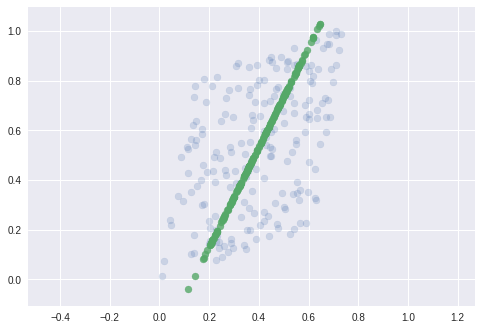

In [0]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

The faded blue points represent actual data and green points represent the mapped data. Visually speaking, the principal component seems to catch the pattern of the data quite good.

### Eigenfaces

Eigenfaces are eigenvectors when they are used in facial recognition problem of computer vision. 

We use here faces dataset given by *sklearn*.

In [0]:
from sklearn.datasets import fetch_lfw_people

Fetching the dataset.

In [0]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [0]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


We are using here Randomized PCA which is an advanced form of PCA. We can use that algorithm by giving *'randomized'* property to *svd_solver* keyword variable.

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

Let's take 150 principal components out of around 3000 dimensions and see some of the eigenfaces.

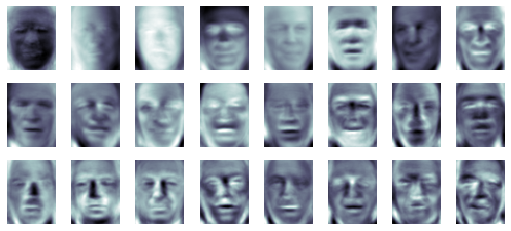

In [0]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                        )

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Plotting the *cumulative explained variance* against the *number of principal components*, we see 150 principal components being able to explain over 90% of the variance.

Text(0, 0.5, 'cumulative explained variance')

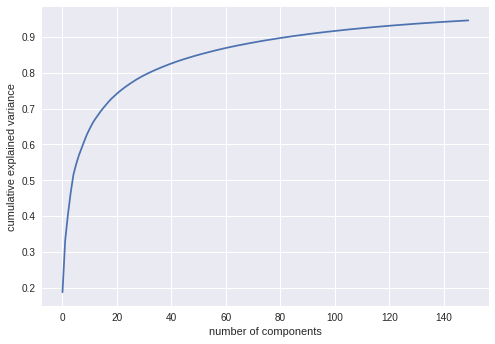

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Rather than using three thousands of dimensions, let's regenerate the images using just 150 dimensions and see how they reproduce.

In [0]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

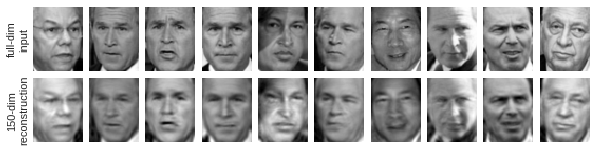

In [0]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

The 150-dim reconstruction is resonably able to retain the features required for recognition. For the human eyes, the reconstructed images are quite distinguishable.

**Importance**:
1. Eigenface adequately reduces statistical complexity in face image representation.
2. Once eigenfaces of a database are calculated, face recognition can be achieved in real time.

### Assignment
Take 100 components and do the reconstruction

## K-Means Clustering

### Overview

Clustering generally means the process of forming clusters. From the perspective of machine learning, it refers to bringing the "identical/similar" data points together. 

For example, if we take a collection of students and form different groups based on some features, the process is clustering. As we didn't require labels for the students and used only features, the clustering process is unsupervised learning.

k-means clustering is the clustering algorithm which partitions *n* observations into *k* clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

Here, we use *sklearn* to implement *k-means clustering*.  Let's start with the standard imports.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns;
import numpy as np

Let's generate isotropic Gaussian blobs for clustering with four centers.



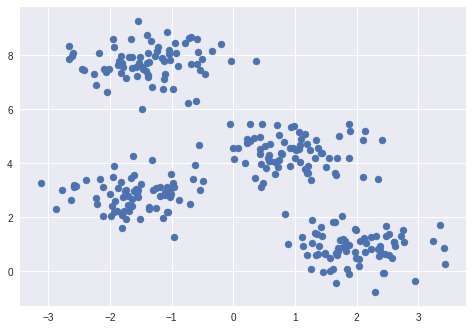

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

For the bare human eyes, the data is easily separable. We see four clusters.

Let's see *k*-Means clustering separating the clusters.

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

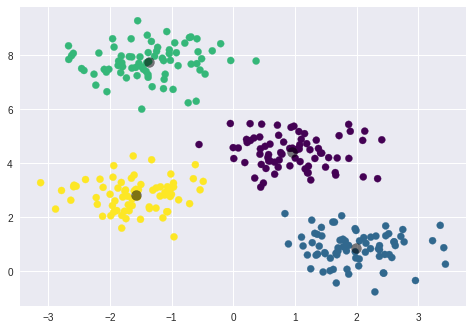

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

### Parameters

Affecting Parameters:
* Number of clusters
* Initial cluster centers.

Let's take 6 clusters and do the separation. 

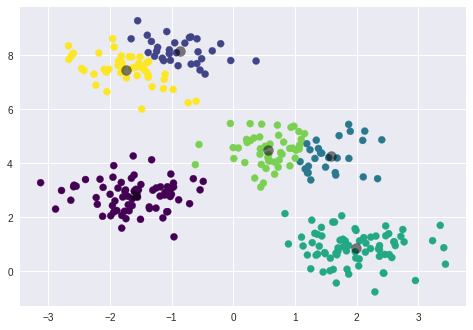

In [0]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

If we don't set the number of clusters right, the clustering might not be perfect. So, number of clusters is something which we should think about. In some problem, the domain knowledge facilitates the selection of number of clusters otherwise we should use techniques like silhouette analysis.

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries. Consider the following data, along with the cluster labels found by the typical k-means approach:

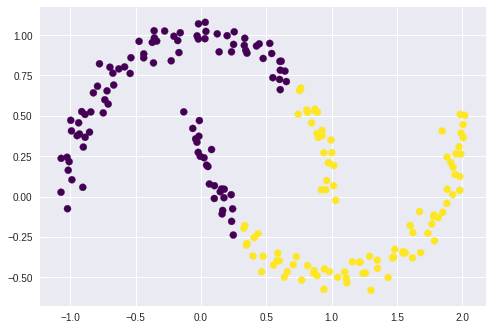

In [0]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

We might be able to project the data into higher dimension and then account for non-linear boundary.

One version of higher dimension projection is implemented in Scikit-Learn within the *SpectralClustering* estimator.

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


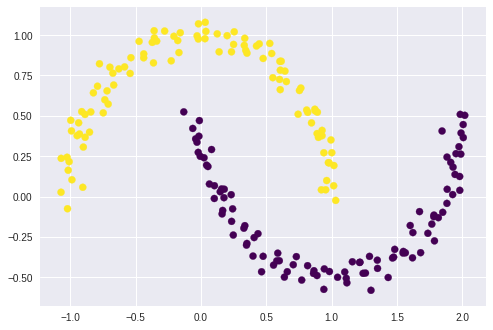

In [0]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Example: Unsupervised Digits Classification

Let's use *k*-means clustering in digits classification. We would use dataset from *sklearn*.

In [0]:
# loading the dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Let's cluster using *k*-Means by taking 10 clusters. As we already know there can not be more than 10 clusters, it became easy to select the number of clusters.

In [0]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

Let's now plot the center of all the clusters. Ideally we would want to see unique digits as the cluster centers.

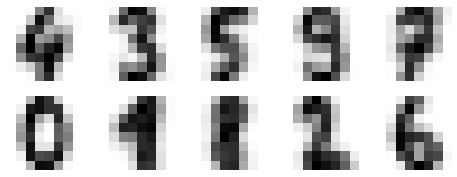

In [0]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Except 1 and 8, other values are quite distinguishable.

Because k-means does not know anything about our real labels, let's match the predicted labels to real labels by finding the mode of the real labels in the predicted ones.

In [0]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now, let's calculate the accuracy of our classification.

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


0.7935447968836951

By just using unsupervised learning, we are able to do the prediction for 79% of the data which is quite impressive.

Let's also plot the confusion matrix of the predictions.

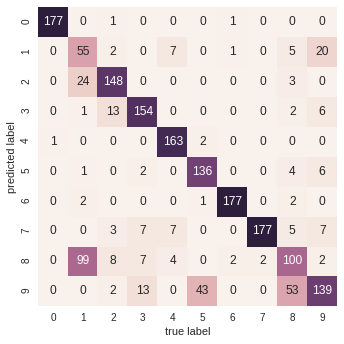

In [0]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

As suspected earlier, the true labels 1 and 8 are not predicted accurately.

Let's try to push this even farther by using t-SNE algorithm to pre-process the data before doing clustering.

It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions.

In [0]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121

Impressive!

### Assignment
Generate isotropic Gaussian blobs with 10 centers and cluster them using k-means.

## References

### PCA

https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

### K-Means Clustering

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html